> Implementar uma solução de seleção de variáveis usando Wrapper. O algoritmo de busca deve ser o Algoritmo Genético. O algoritmo de aprendizagem deve ser o KNN com K=3.
>
> [Espeficicação do Projeto](https://drive.google.com/file/d/1Cus0MfsM7BCAMDWNXqJFOEPDzAeWhxsF/view)



In [4]:
# Importar Base de Dados
import pandas as pd

url = 'https://raw.githubusercontent.com/AndersonAlencarBarros/IC/main/Sele%C3%A7%C3%A3o%20de%20Varia%C3%A7%C3%B5es%20usando%20Algoritmo%20Gen%C3%A9tico/AG.csv'
data = pd.read_csv(url)
data.head(3)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,Y
0,1.0,0.668836,0.223671,0.049866,0.008338,0.001115,0.000124,1.187973e-05,9.931989e-07,7.380968e-08,4.936657e-09,3.001649e-10,1.673009e-11,8.607449e-13,4.112122e-14,1.833557e-15,7.664679e-17,3.015537e-18,1.120500e-19,3.944371e-21,4.017793,2.164501,-0.521489,-1.981021,1.086093,0.296291,3.068366,-0.671233,-2.550676,-2.502836,-4.960745,5.515064,-4.158605,0.618974,-4.116807,-0.435625,-4.429051,-1.630177,-3.976518,-1.281325,5.430095
1,1.0,-0.327953,0.053777,-0.005879,0.000482,-0.000032,0.000002,-8.095714e-08,3.318772e-09,-1.209336e-10,3.966061e-12,-1.182439e-13,3.231543e-15,-8.152274e-17,1.909690e-18,-4.175264e-20,8.558078e-22,-1.650971e-23,3.008010e-25,-5.192039e-27,-2.601528,3.395143,-3.917285,2.895150,-1.687813,0.086479,-2.400884,2.842392,0.889150,-2.663525,5.728164,2.776594,-0.024665,-1.347030,-0.699568,-1.551804,-0.181644,-1.918719,2.501295,0.074414,4.262274
2,1.0,0.850103,0.361338,0.102391,0.021761,0.003700,0.000524,6.366070e-05,6.764772e-06,6.389728e-07,5.431929e-08,4.197910e-09,2.973881e-10,1.944697e-11,1.180852e-12,6.692310e-14,3.555722e-15,1.778077e-16,8.397495e-18,3.757231e-19,-3.925193,-4.154145,2.648960,0.017615,3.625035,-3.210216,2.614243,0.611922,-2.539454,2.663654,3.645306,-0.036363,0.410337,0.815217,0.101219,-0.101883,0.815899,-2.736296,6.157502,1.206547,5.325627


In [ ]:
# Importar Bibliotecas
import numpy as np
import random
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor

0.0851542612901014


Text(0, 0.5, 'Y previsto')

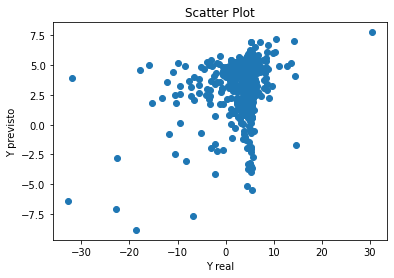

In [ ]:
# KNN k=3 para a base inteira
X_data = data.iloc[:, :-1]
y_data = data['Y']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size=0.3, random_state=30)
knn = KNeighborsRegressor(n_neighbors=3)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(r2_score(y_test, y_pred))

plt.plot(y_test, y_pred, ls='', marker='o')
plt.title("Scatter Plot")
plt.xlabel("Y real")
plt.ylabel("Y previsto")

> Algoritmo Genético

In [ ]:
# Algoritmo que mapeia o cromossomo para a base de dados
def select_columns(chromosome):
  columns = []
  for i in range(0, len(chromosome)):
    if chromosome[i] == 0:
      columns.append(data.columns.to_list()[i])

  return data.drop(columns=columns)

In [ ]:
def initilization_of_population(size, n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat, dtype=np.int)
        chromosome[:int(0.4*n_feat)] = 0
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

In [ ]:
def fitness(population):
    scores = []
    for chromosome in population:
        data_selected = select_columns(chromosome)
        X_data = data_selected.iloc[:, :-1]
        y_data = data_selected['Y']
        neigh = KNeighborsRegressor(n_neighbors=3)
        neigh = neigh.fit(X_data, y_data)
        y_pred = neigh.predict(X_data)
        scores.append(r2_score(y_data, y_pred))

    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

In [ ]:
def selection(pop_after_fit, n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

In [ ]:
def crossover(pop_after_sel):
    population_nextgen = pop_after_sel
    for i in range(len(pop_after_sel) - 1):
        crossover_rate = random.random()
        if crossover_rate > 0.4:
          child_1 = np.concatenate((pop_after_sel[i][:int(crossover_rate * len(pop_after_sel[i]))], 
                                    pop_after_sel[i+1][int(crossover_rate * len(pop_after_sel[i])):]))
          child_2 = np.concatenate((pop_after_sel[i+1][:int(crossover_rate * len(pop_after_sel[i]))], 
                                    pop_after_sel[i][int(crossover_rate * len(pop_after_sel[i])):]))

          population_nextgen.append(child_1)
          population_nextgen.append(child_2)
          
    return population_nextgen

In [ ]:
def mutation(pop_after_cross, mutation_rate):
    population_nextgen = []
    for i in range(0, len(pop_after_cross)):
        chromosome = pop_after_cross[i]
        for j in range(len(chromosome)):
            if random.random() < mutation_rate:
                chromosome[j] = not chromosome[j]
        population_nextgen.append(chromosome)
    return population_nextgen

In [ ]:
# Algoritmo Genético

def generations(size, n_feat, n_parents, mutation_rate, n_gen):
    best_chromo = []
    best_score = []
    population_nextgen = initilization_of_population(size, n_feat)
    for i in range(n_gen):
      print("Executando Algoritmo Genético...")
      scores, pop_after_fit = fitness(population_nextgen)
      pop_after_sel = selection(pop_after_fit,n_parents)
      pop_after_cross = crossover(pop_after_sel)
      population_nextgen = mutation(pop_after_cross, mutation_rate)
      best_chromo.append(pop_after_fit[0])
      best_score.append(scores[0])

      if scores[0] > 0.98:
        break

    best_score, best_chromo = np.array(best_score), np.array(best_chromo) 
    inds = np.argsort(best_score)
    best_score = list(best_score[inds][::-1])
    best_chromo = list(best_chromo[inds,:][::-1])    
    
    return best_chromo[0],best_score[0]

In [ ]:
chromo, score = generations(size=400, n_feat=40, n_parents=100, mutation_rate=0.01,
                     n_gen=15)

print("Resultado Final")
print("Chromo: {}".format(chromo))
print("Score: {}".format(score))

Executando Algoritmo Genético...
Executando Algoritmo Genético...
Executando Algoritmo Genético...
Executando Algoritmo Genético...
Executando Algoritmo Genético...
Executando Algoritmo Genético...
Executando Algoritmo Genético...
Executando Algoritmo Genético...
Executando Algoritmo Genético...
Executando Algoritmo Genético...
Resultado Final
Chromo: [1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0]
Score: 0.9919253008970341


In [ ]:
# Gerando nova base de dados baseado na saída do Algoritmo Genético
columns = []
for i in range(0, len(chromo)):
  if chromo[i] == 0:
    columns.append(data.columns.to_list()[i])

data.drop(columns=columns, inplace=True)

In [ ]:
# Divisão da nova base de dados em base de teste e treinamento
X_data = data.iloc[:, :-1]
y_data = data['Y']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size=0.3, random_state=30)

In [ ]:
# KNN com k=3 para a base de treinamento
knn = KNeighborsRegressor(n_neighbors=3)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
# Cálculo do r2_score para o novo conjunto de teste
r2_score(y_test, y_pred)

0.9819223792108476

Text(0, 0.5, 'Y previsto')

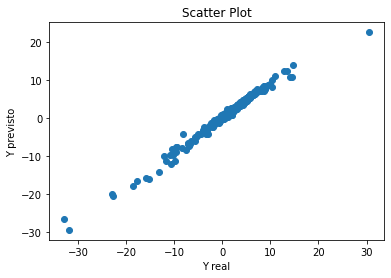

In [ ]:
# Gráfico de Dispersão 
plt.plot(y_test, y_pred, ls='', marker='o')
plt.title("Scatter Plot")
plt.xlabel("Y real")
plt.ylabel("Y previsto")

### Referências

[Feature Selection using Genetic Algorithms in R](https://towardsdatascience.com/feature-selection-using-genetic-algorithms-in-r-3d9252f1aa66)  
[Genetic Algorithm in Machine Learning using Python](https://datascienceplus.com/genetic-algorithm-in-machine-learning-using-python/)  
[Genetic algorithms for feature selection](https://www.neuraldesigner.com/blog/genetic_algorithms_for_feature_selection)  